# Random Forest(Ensemble Learning)

### Random Forest

**Concept:**  
Instead of a single tree, we build a **forest** of multiple decision trees to improve accuracy and reduce overfitting.

**Bagging (Bootstrap Aggregation):**  
Train multiple trees on different **random subsets of the data**.

**Feature Randomness:**  
Each split considers only a **random subset of features**, making the trees more diverse.

**Voting:**  
The **final prediction** is determined by the **majority vote** of all the trees.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load Real Dataset (Heart Disease)
url = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
df_heart = pd.read_csv(url)

# # X/y Split
# X = df_heart.drop('target', axis=1) # Target is 1 (Disease) or 0 (No Disease)
# y = df_heart['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
df_heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [4]:
df_heart.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df_heart.sample()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
289   55    0   0       128   205    0        2      130      1      2.0   

     slope  ca  thal  target  
289      1   1     3       0

In [8]:
df.info()

NameError: name 'df' is not defined

In [9]:
df_heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df_heart.duplicated().sum()

1

In [18]:
df_heart.drop_duplicates(inplace=True)

In [19]:
df_heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[302 rows x 14 columns]

In [20]:
# X/y Split
X = df_heart.drop('target', axis=1) # Target is 1 (Disease) or 0 (No Disease)
y = df_heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
df_heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[302 rows x 14 columns]

In [22]:
# 2. Train Random Forest
# n_estimators = number of trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Predict & Evaluate
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.2f}")

Random Forest Accuracy: 0.87


In [24]:
# 4. Feature Importance (Why RF is powerful for analysis)
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

thalach     0.123093
oldpeak     0.113440
ca          0.111613
cp          0.110655
thal        0.100442
age         0.100309
chol        0.081189
trestbps    0.069357
exang       0.063221
slope       0.056294
sex         0.038493
restecg     0.020906
fbs         0.010988
dtype: float64

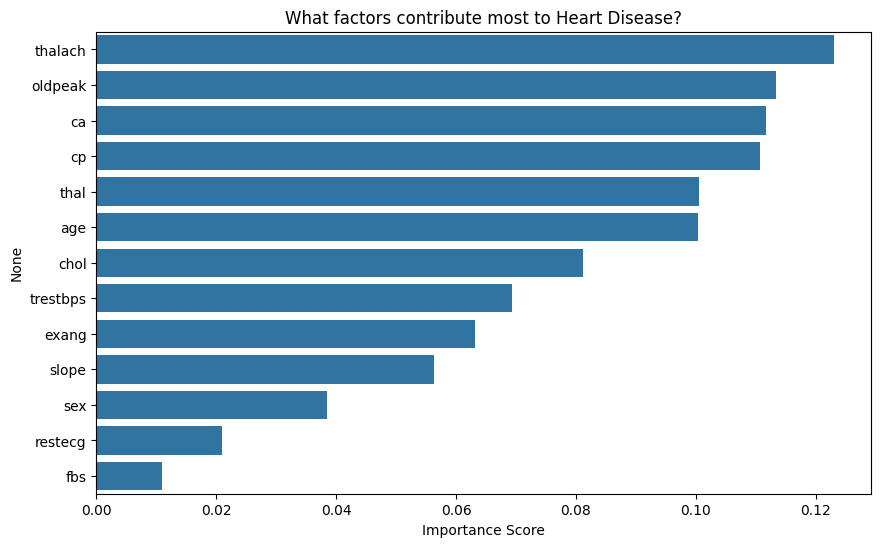

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("What factors contribute most to Heart Disease?")
plt.xlabel("Importance Score")
plt.show()

In [26]:
rf_pred=rf_model.predict(X_test)

In [27]:
for i,j in zip(rf_pred,y_test):
    print(i,j)

0 0
0 0
0 1
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 0
0 1
0 0
1 0
1 1
1 1
1 0
0 0
1 1
0 0
1 1
0 1
0 0
0 0
0 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0


In [28]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

print(classification_report(y_test, rf_pred))

precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Precision: 0.90
Recall: 0.84
F1 Score: 0.87


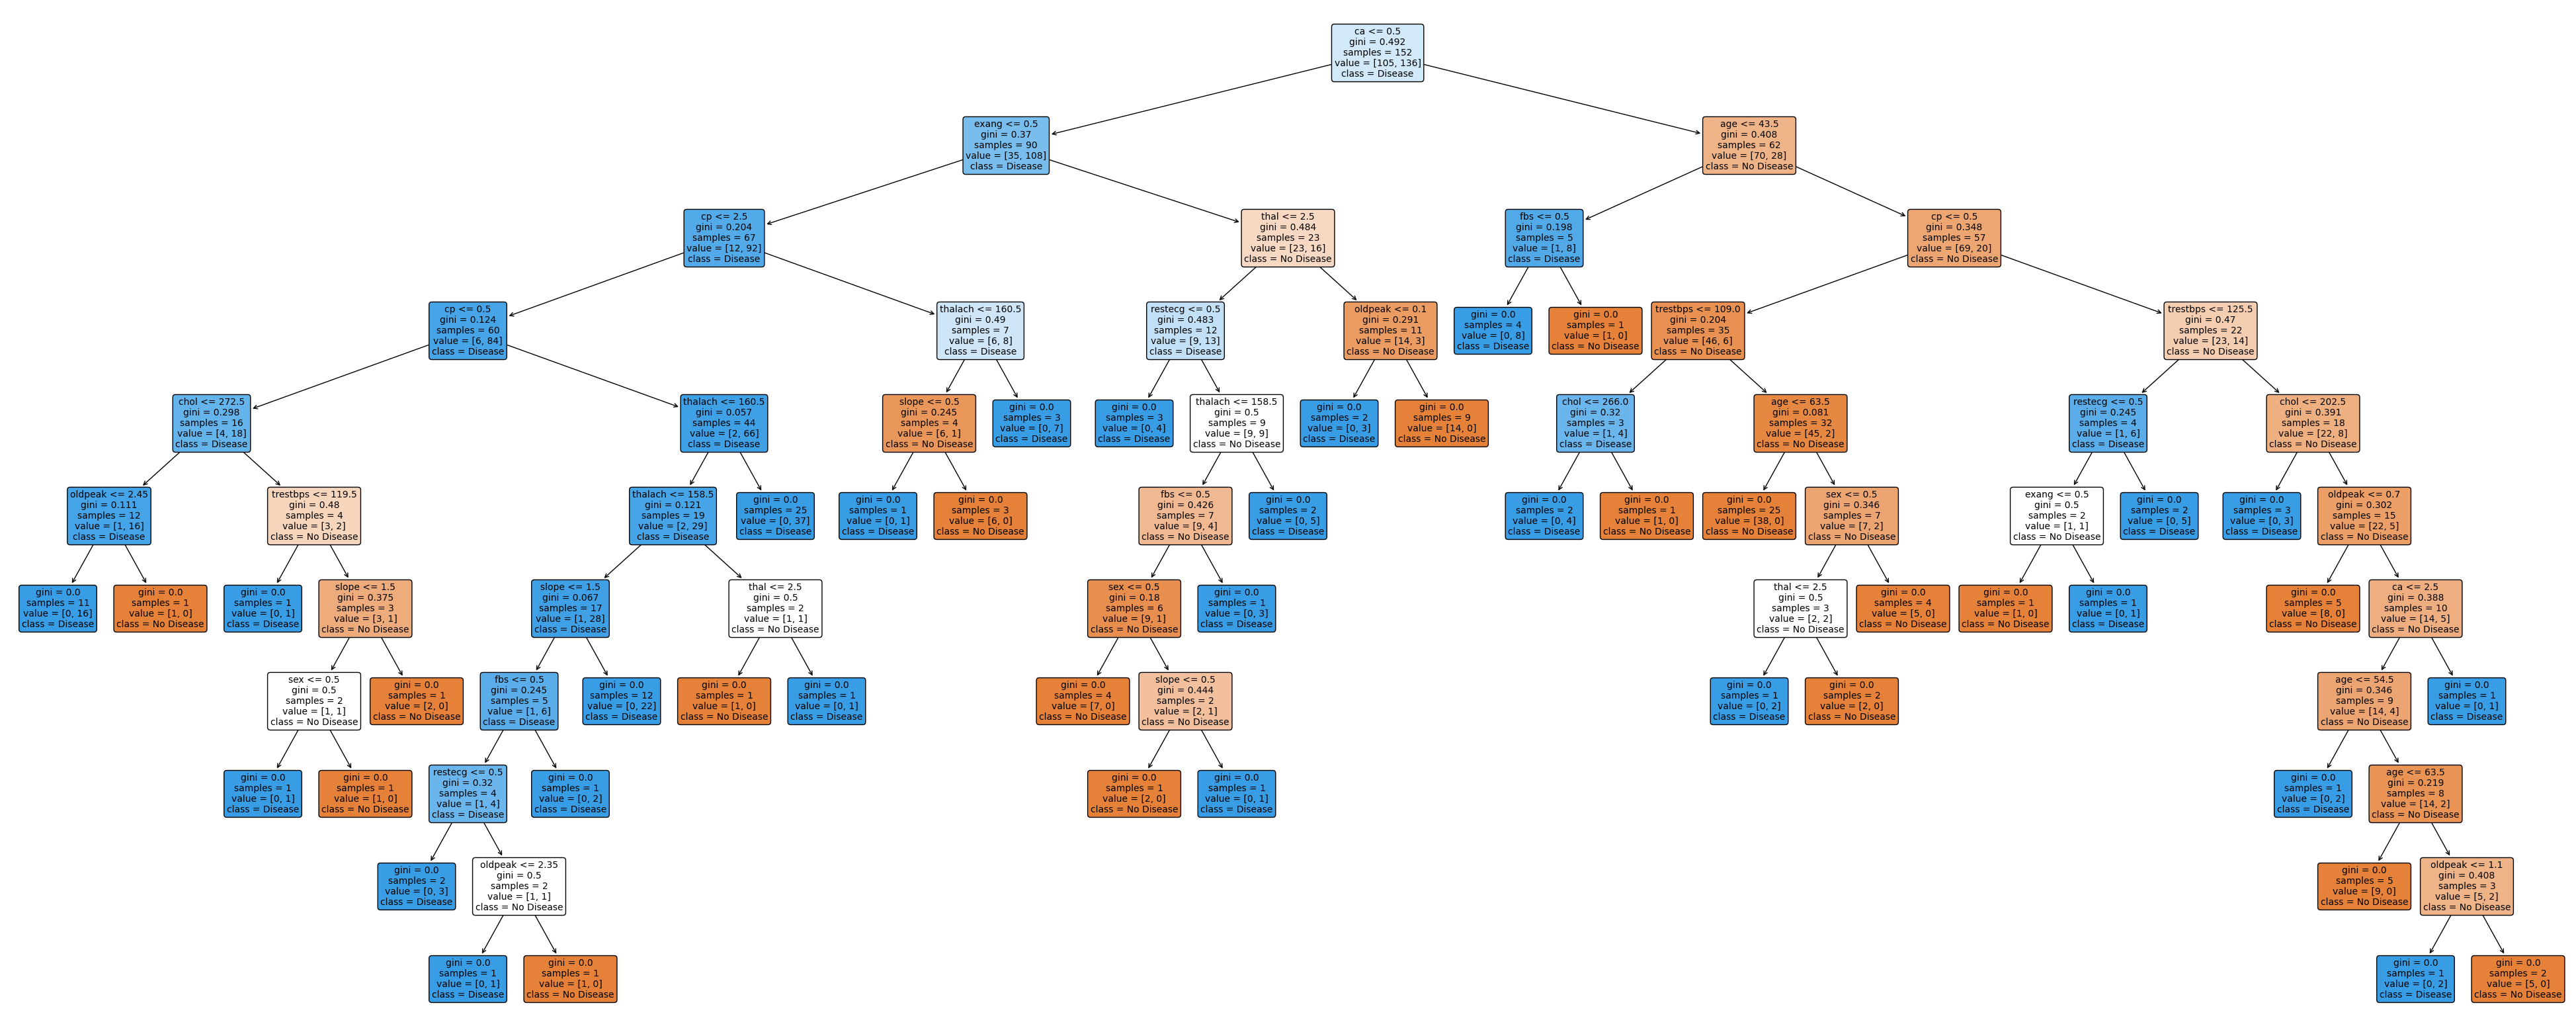

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select the first tree in the forest
tree = rf_model.estimators_[1]

plt.figure(figsize=(50,20))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [30]:
df_heart.sample()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
109   50    0   0       110   254    0        0      159      0      0.0   

     slope  ca  thal  target  
109      2   0     2       1

In [31]:
rf_pred=rf_model.predict([[50,0,0,110,254,0,0,159,0,0.0,2,0,2]])
print(rf_pred)

[1]


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


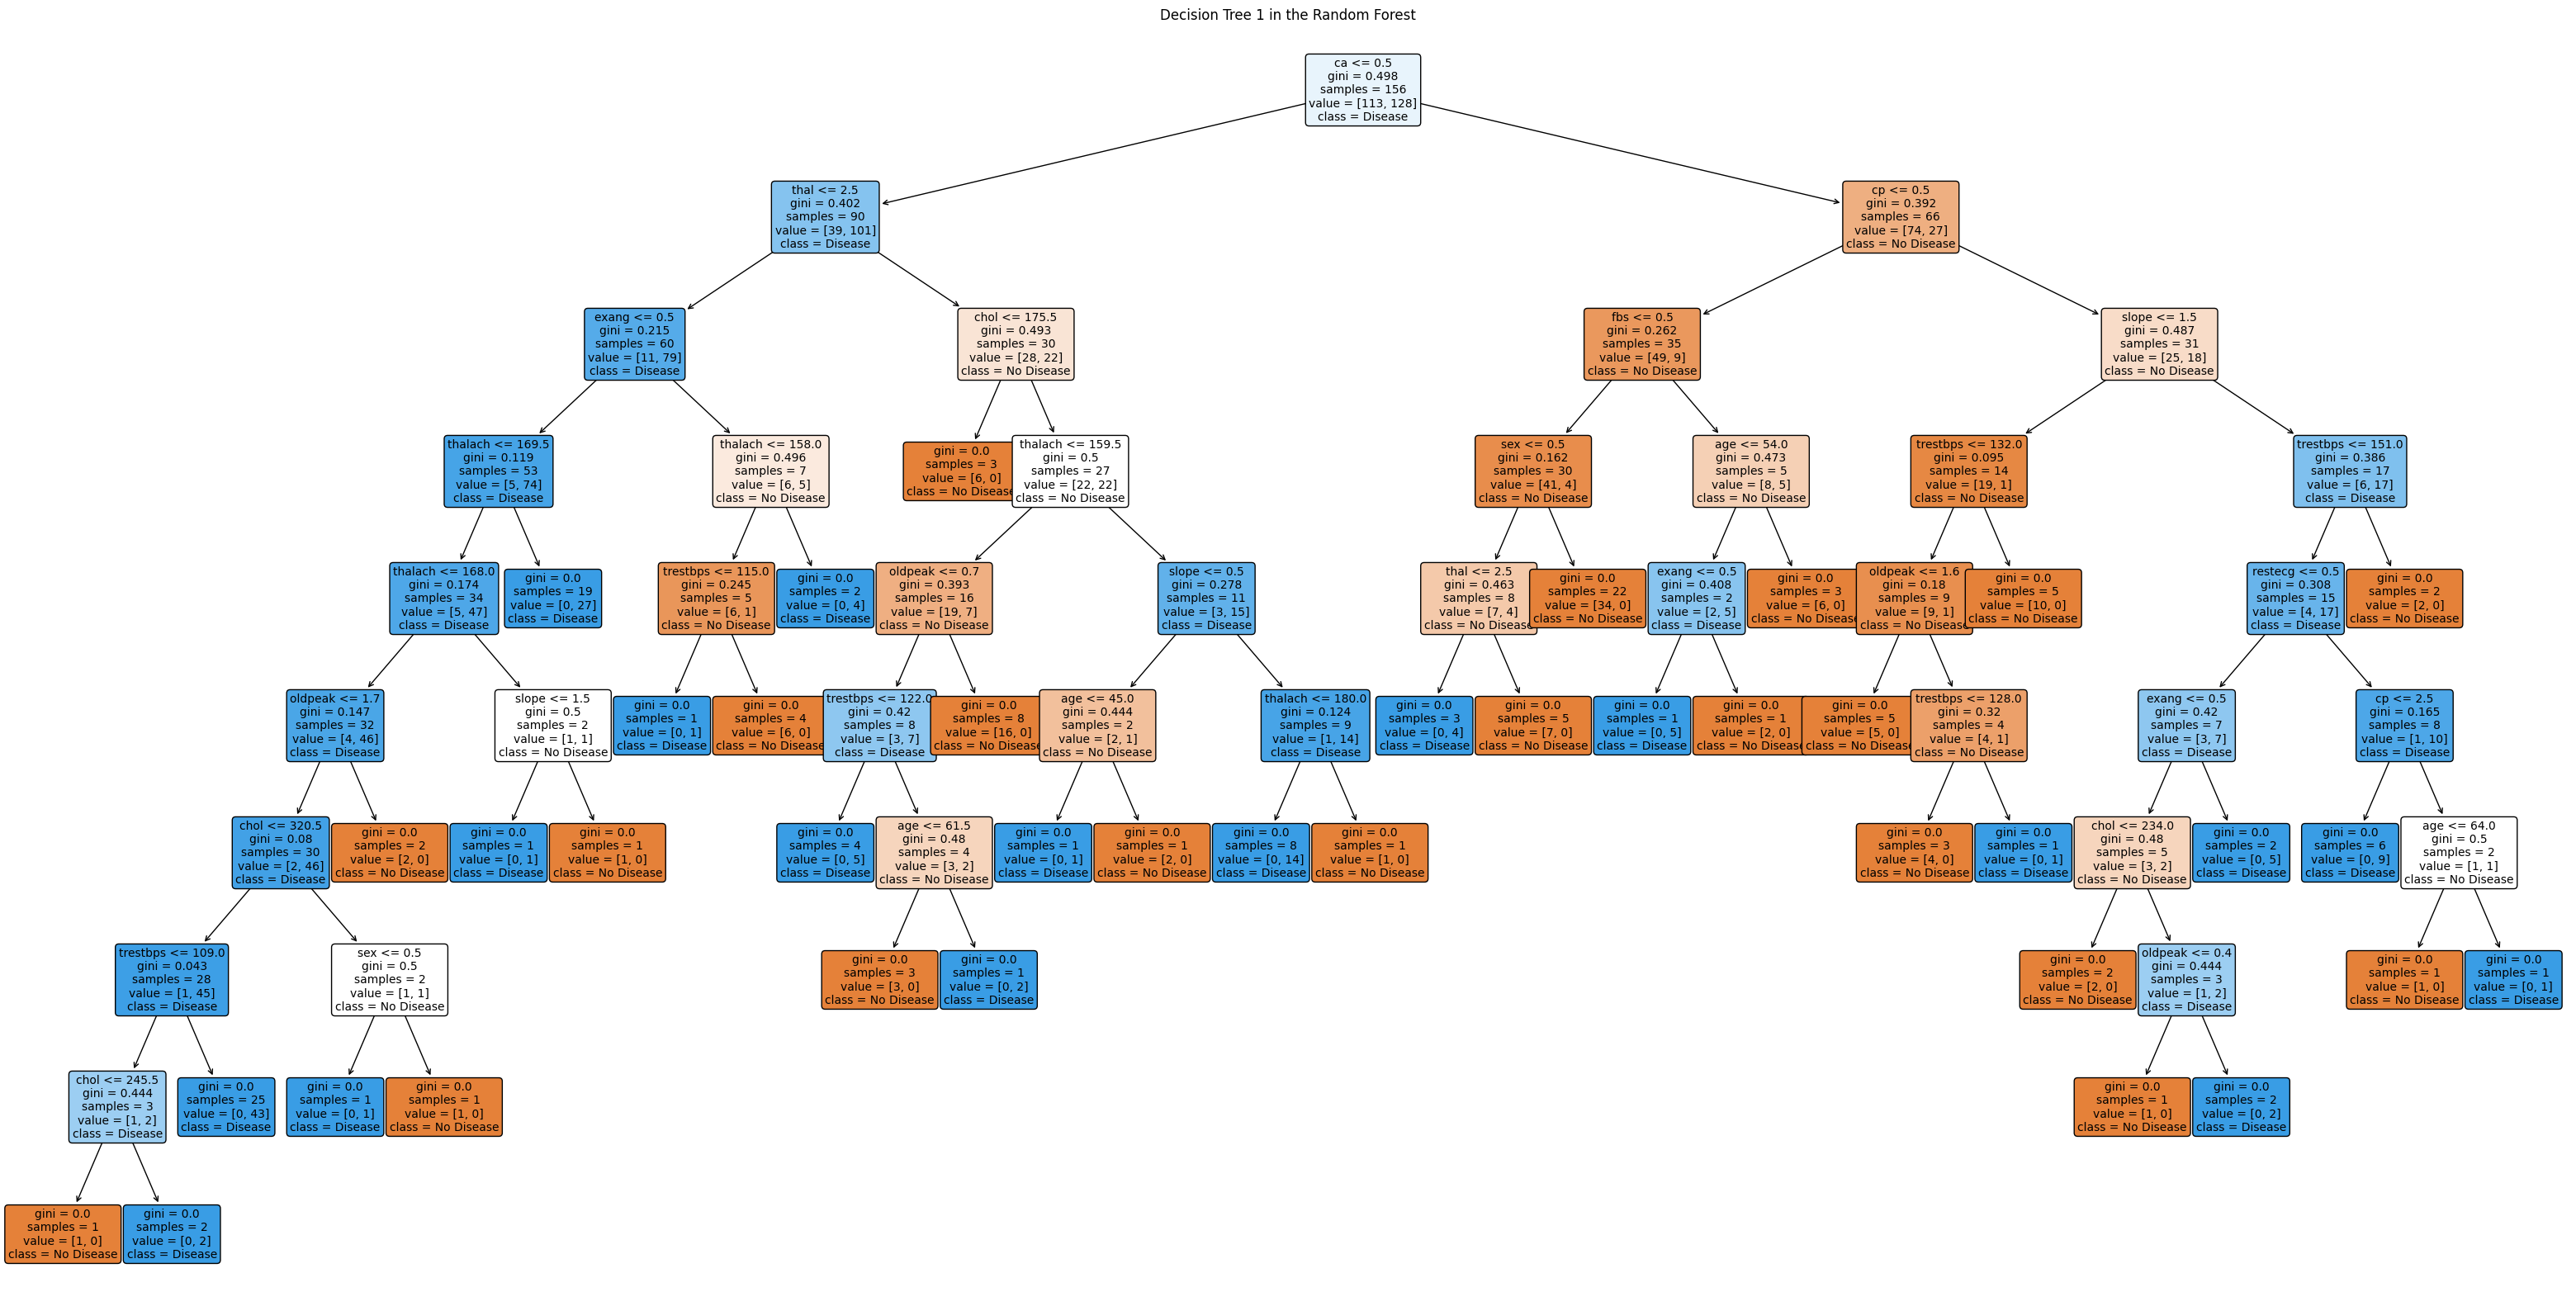

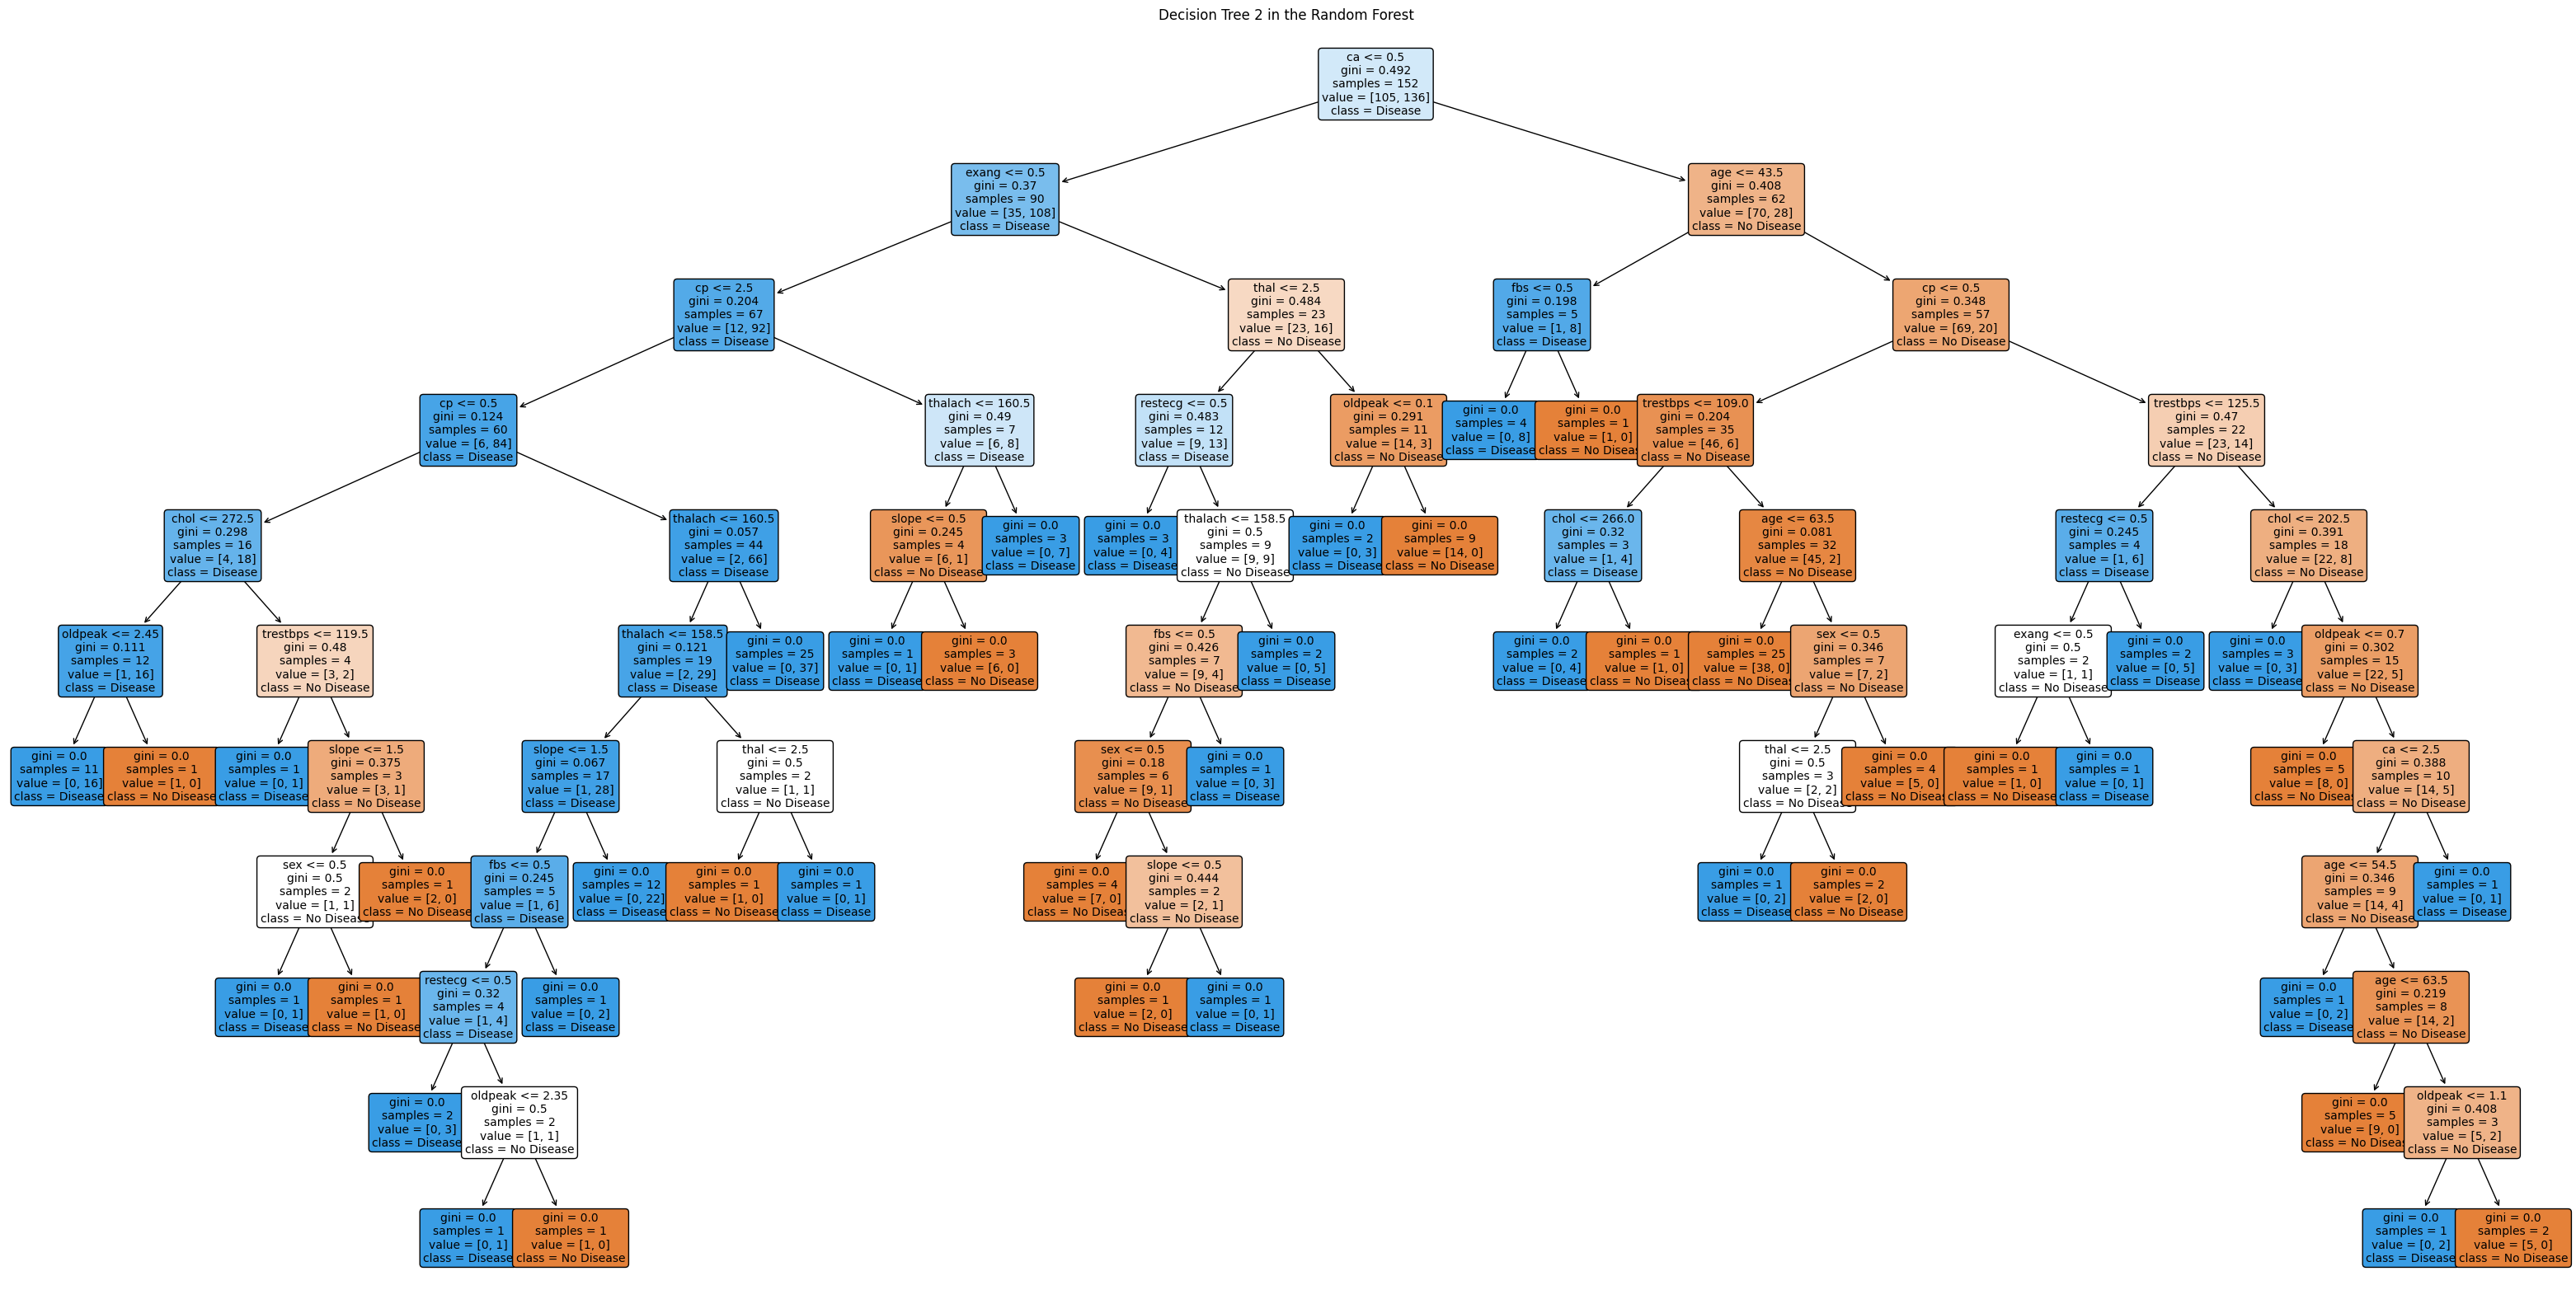

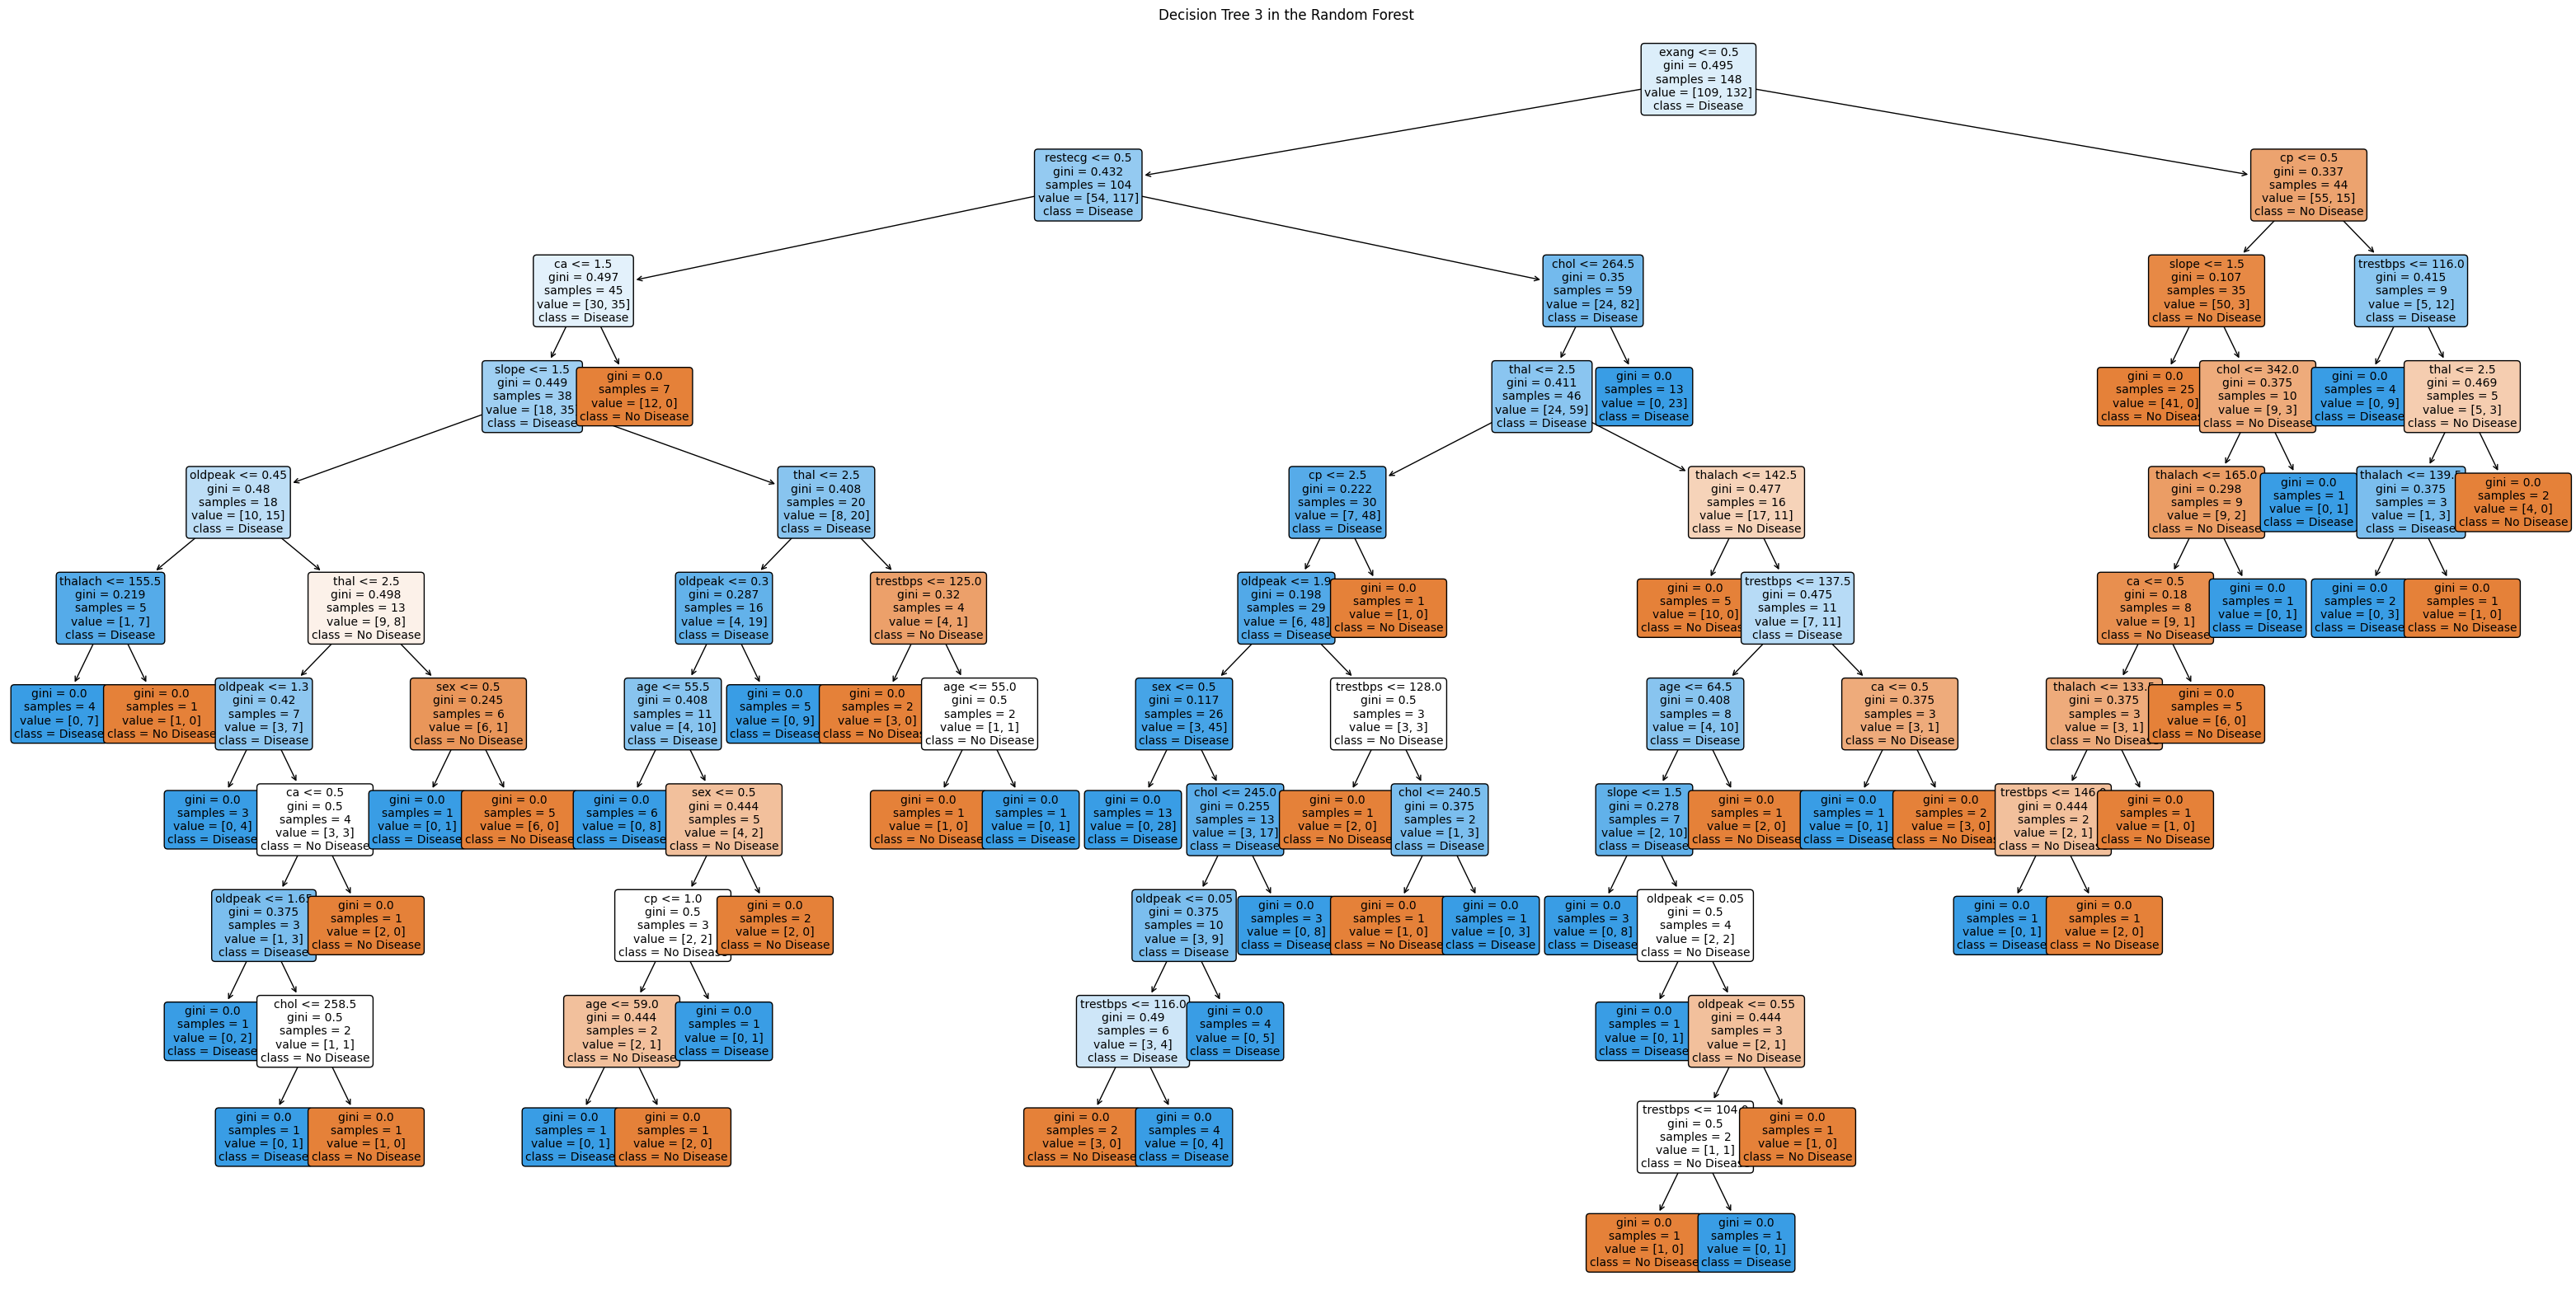

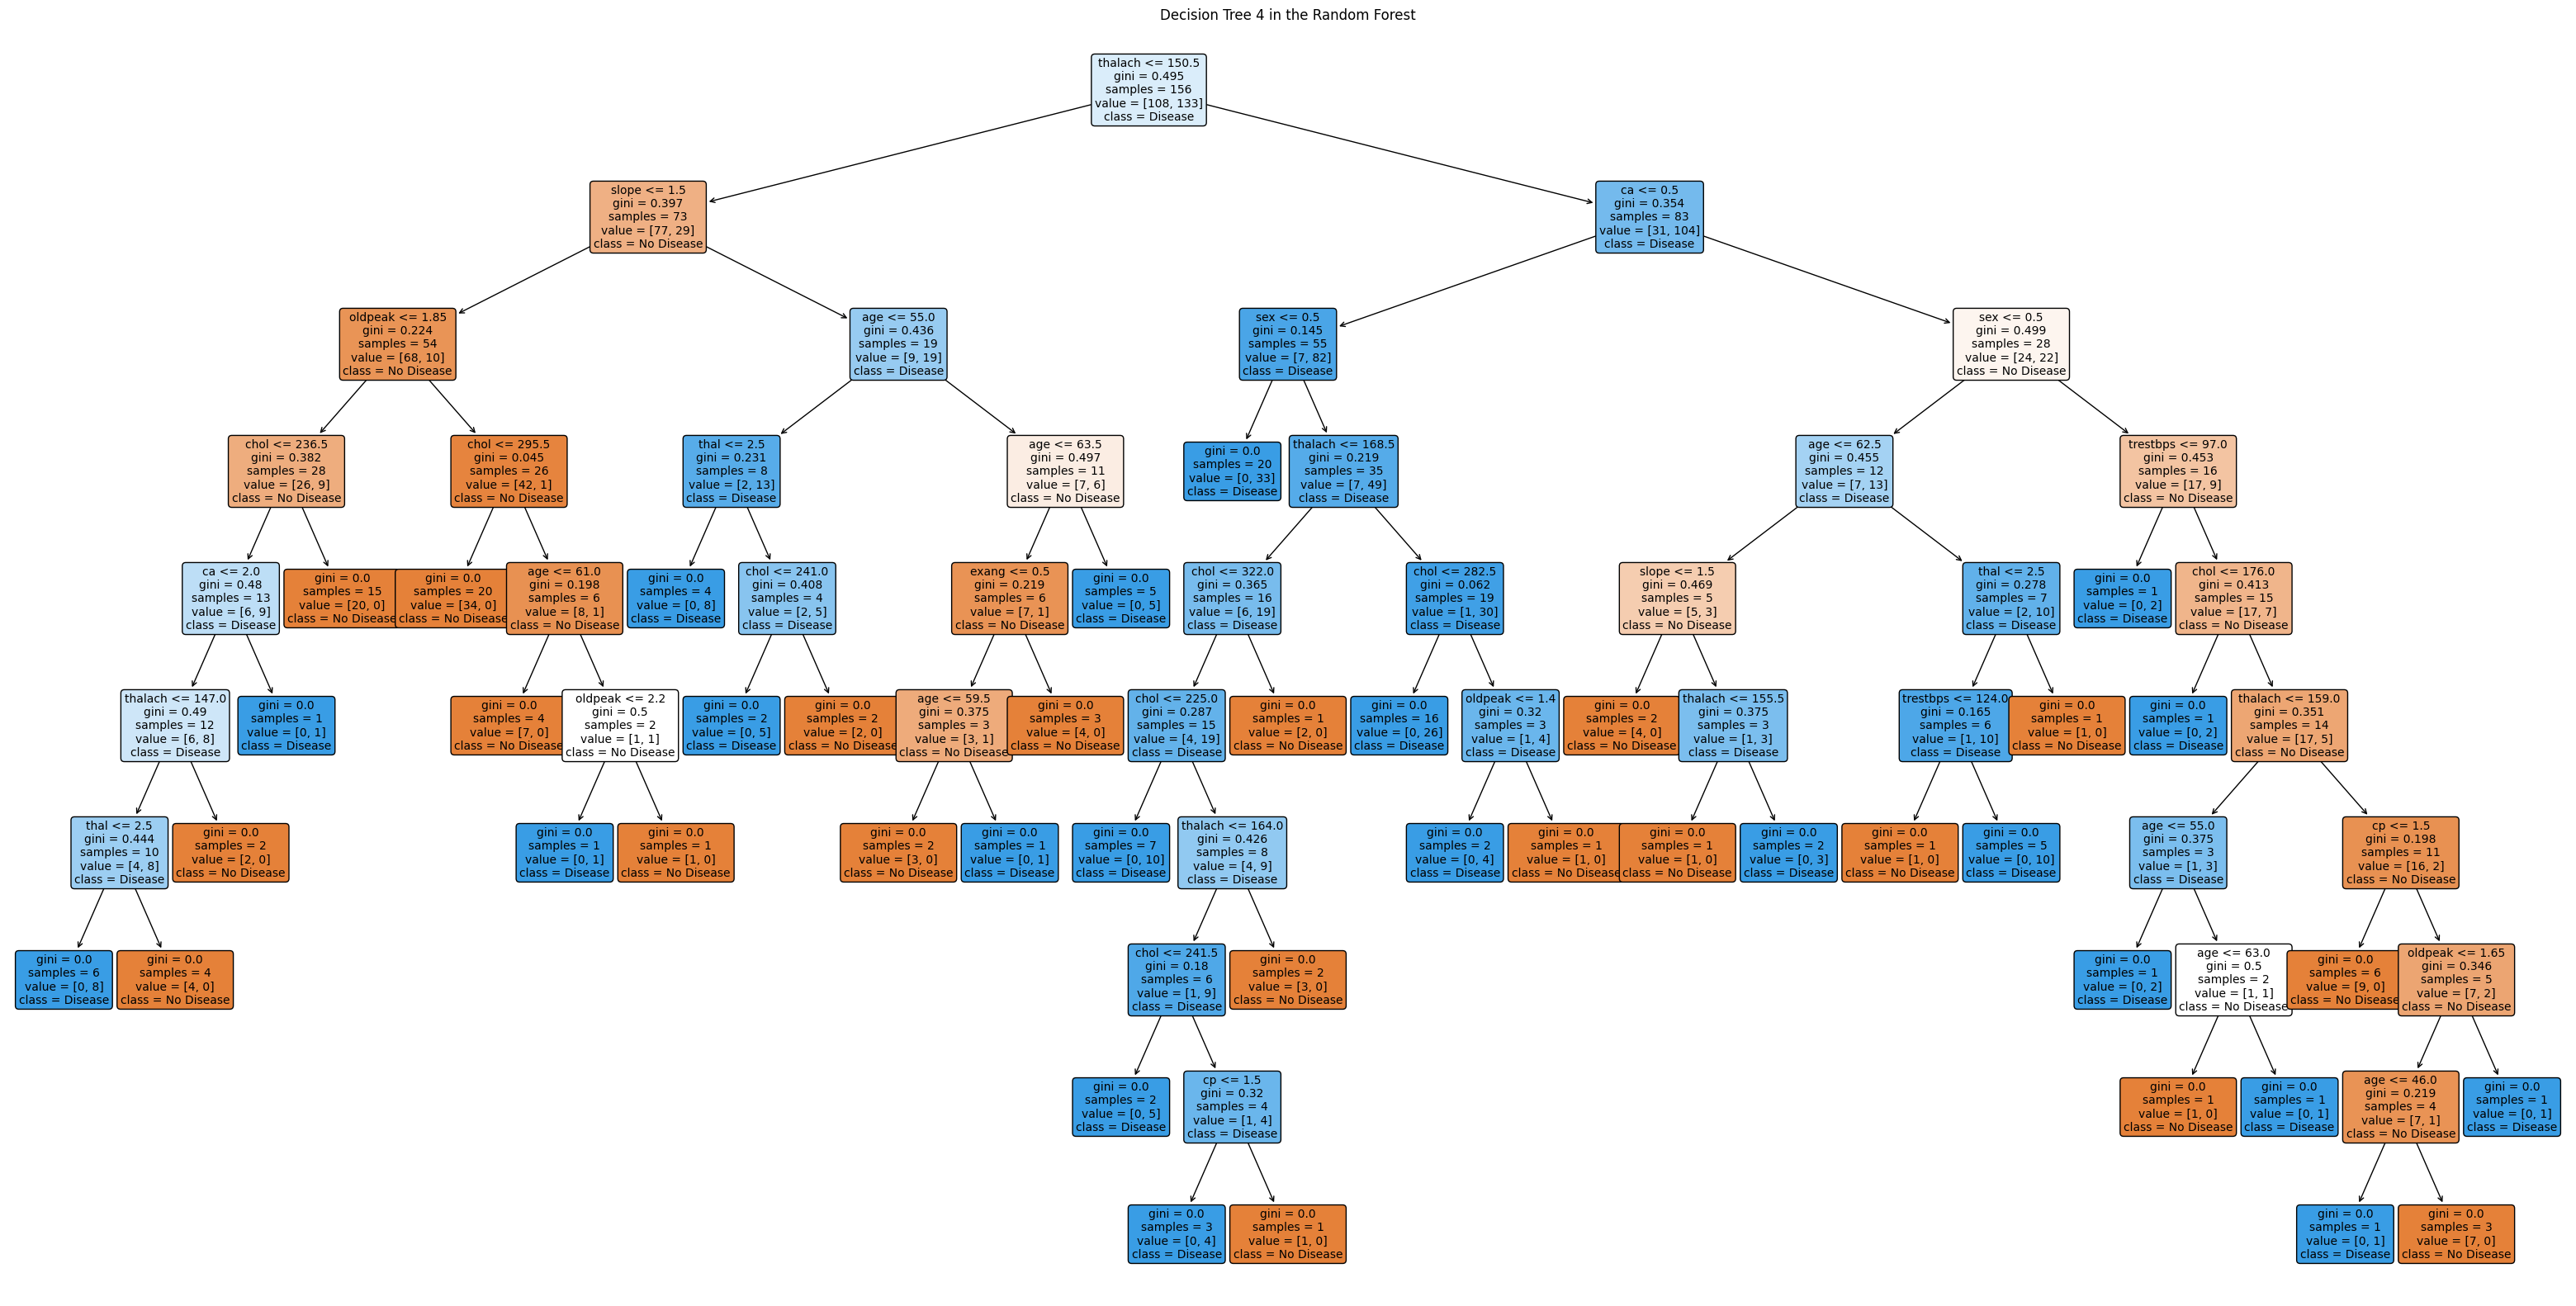

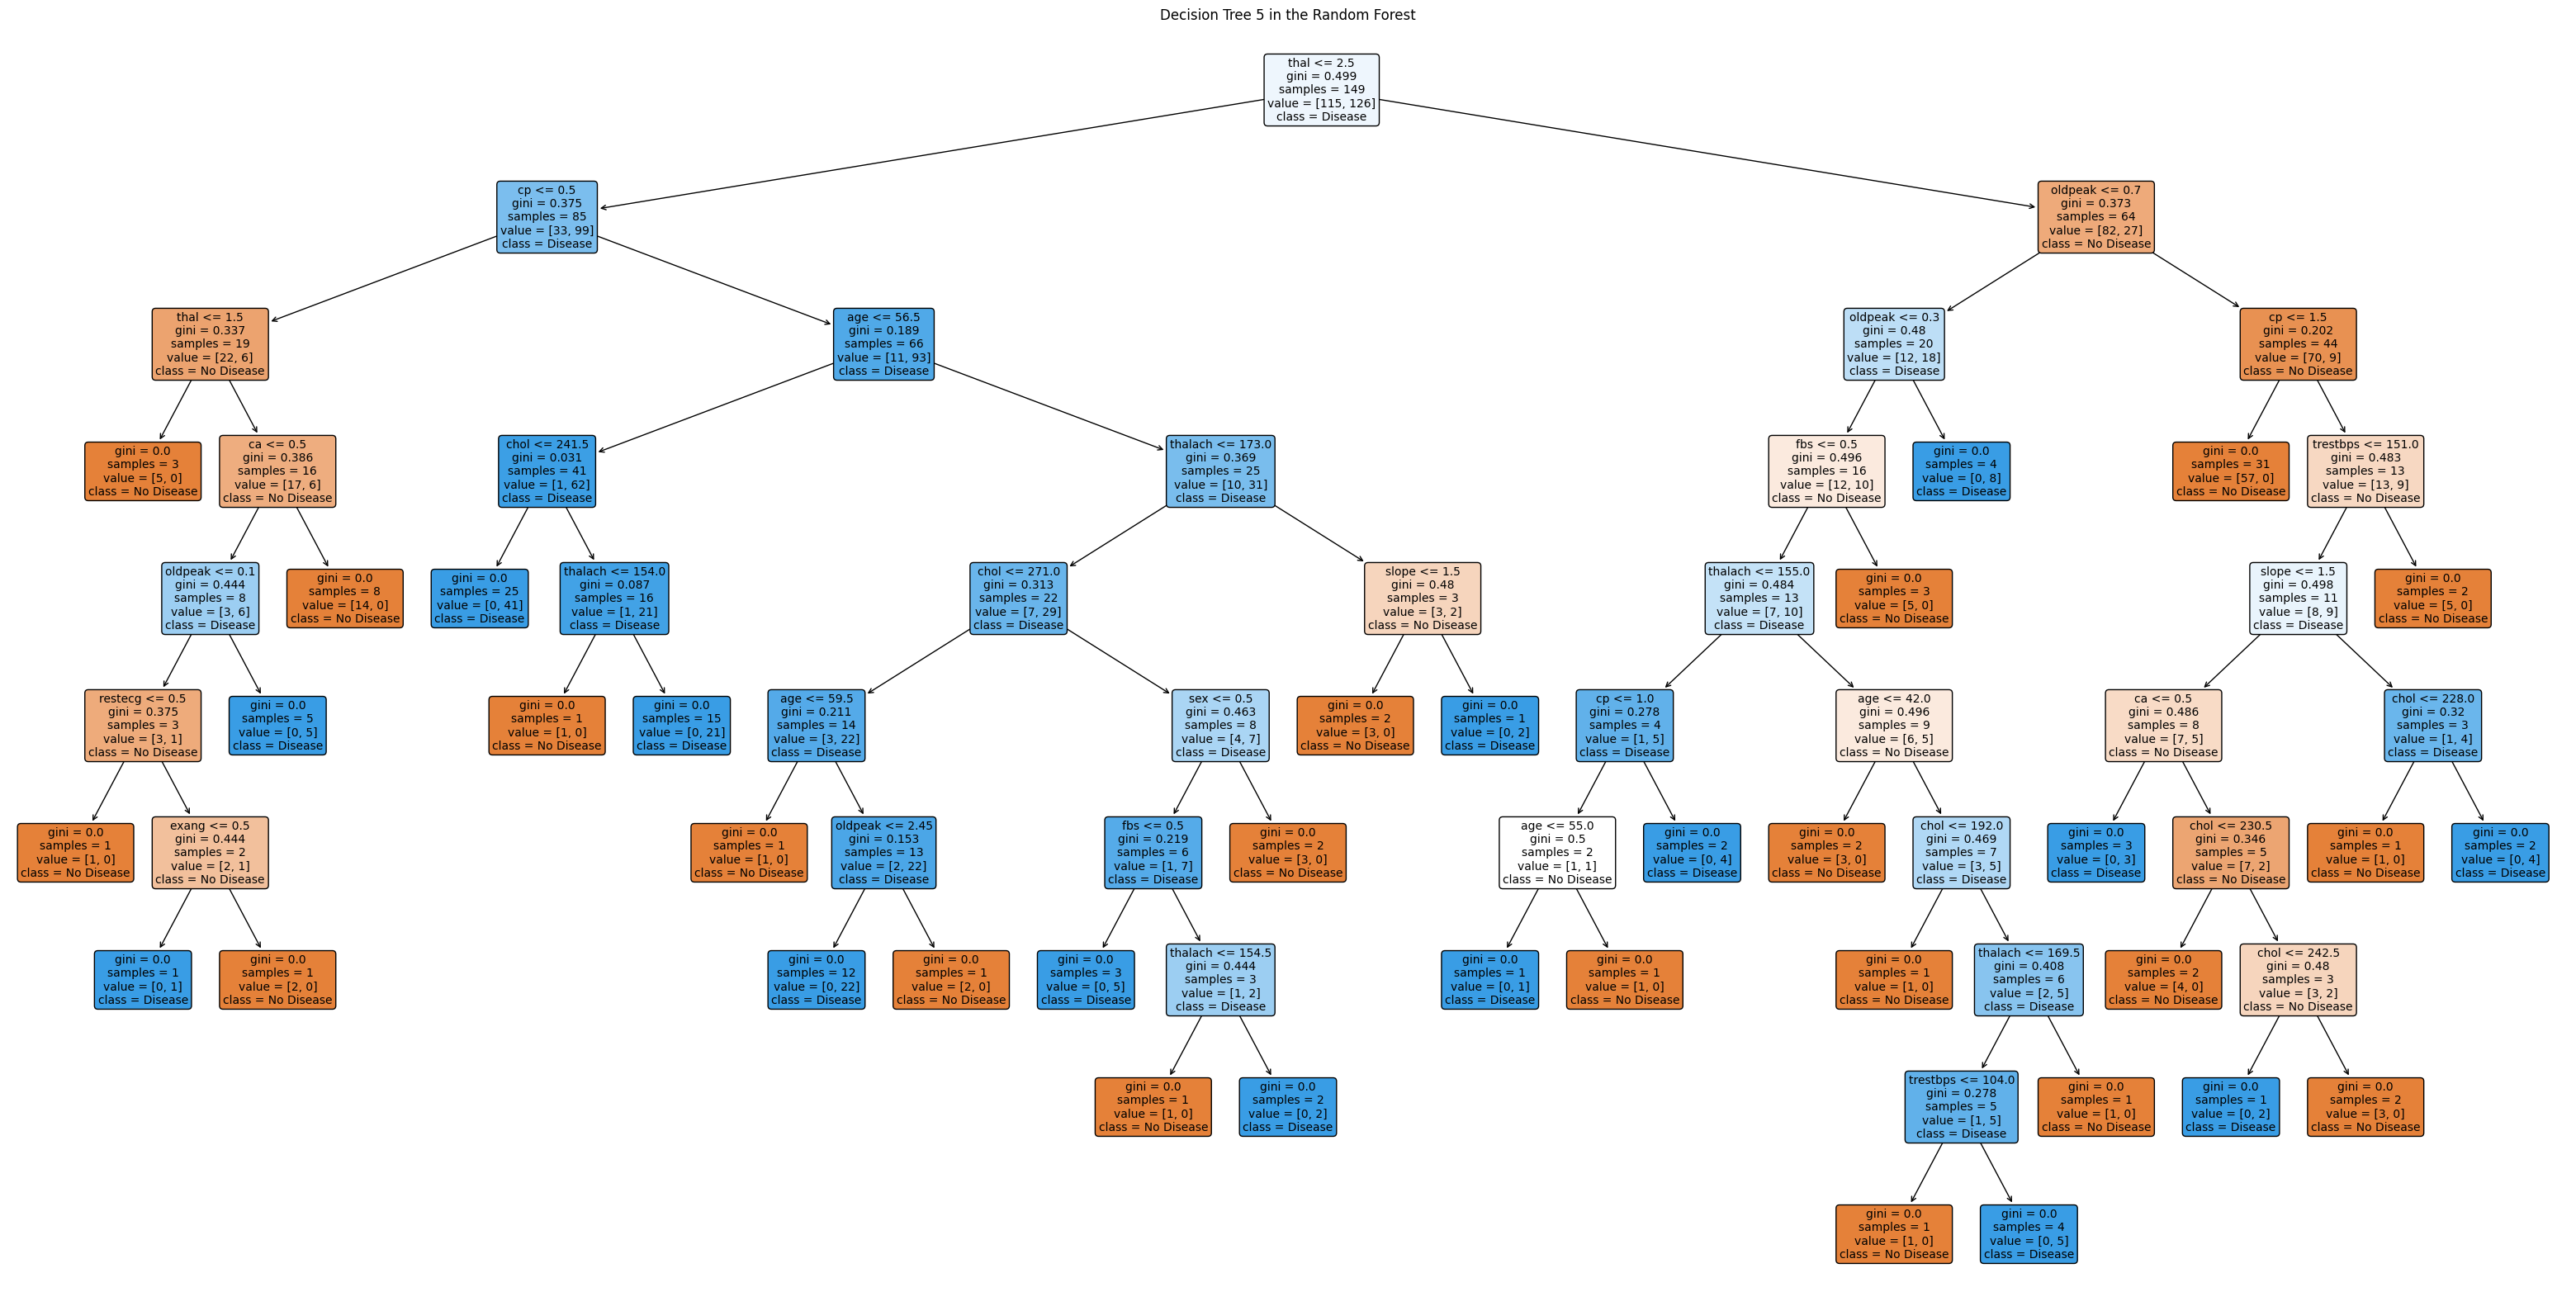

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# How many trees you want to visualize
num_trees_to_plot = 5  

for i in range(num_trees_to_plot):
    tree = rf_model.estimators_[i]
    plt.figure(figsize=(40,20))
    plot_tree(
        tree,
        feature_names=X.columns,
        class_names=['No Disease', 'Disease'],
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.title(f"Decision Tree {i+1} in the Random Forest")
    plt.show()

In [39]:
df=pd.read_csv("clean_income_census_data.csv")

In [40]:
df

age    fnlwgt  education.num  capital.gain  capital.loss  \
0      2.909754 -1.067997      -0.420060      -0.14592     10.593507   
1      2.909754 -0.539169      -0.420060      -0.14592     10.593507   
2      2.024532 -0.035220      -0.031360      -0.14592     10.593507   
3      1.139310 -0.468215      -2.363558      -0.14592      9.461864   
4      0.180319  0.709482      -0.031360      -0.14592      9.461864   
...         ...       ...            ...           ...           ...   
32556 -1.221282  1.140460      -0.031360      -0.14592     -0.216660   
32557 -0.852440  0.639741       0.746039      -0.14592     -0.216660   
32558  0.106551 -0.335433      -0.420060      -0.14592     -0.216660   
32559  1.434384 -0.358777      -0.420060      -0.14592     -0.216660   
32560 -1.221282  0.110960      -0.420060      -0.14592     -0.216660   

       hours.per.week  workclass_Federal-gov  workclass_Local-gov  \
0           -0.194354                  False                False   
1           -1.406591                  False                False   
2           -0.194354                  False                False   
3           -0.194354                  False                False   
4           -0.194354                  False                False   
...               ...                    ...                  ...   
32556       -0.194354                  False                False   
32557       -0.517617                  False                False   
32558       -0.194354                  False                False   
32559       -0.194354                  False                False   
32560       -1.406591                  False                False   

       workclass_Never-worked  workclass_Private  ...  relationship_Own-child  \
0                       False              False  ...                   False   
1                       False               True  ...                   False   
2                       False              False  ...                   False   
3                       False               True  ...                   False   
4                       False               True  ...                    True   
...                       ...                ...  ...                     ...   
32556                   False               True  ...                   False   
32557                   False               True  ...                   False   
32558                   False               True  ...                   False   
32559                   False               True  ...                   False   
32560                   False               True  ...                    True   

       relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                       False              False                    False   
1                       False              False                    False   
2                        True              False                    False   
3                        True              False                    False   
4                       False              False                    False   
...                       ...                ...                      ...   
32556                   False              False                    False   
32557                   False               True                    False   
32558                   False              False                    False   
32559                    True              False                    False   
32560                   False              False                    False   

       race_Black  race_Other  race_White  sex_Male  income_encoded  \
0           False       False        True     False               0   
1           False       False        True     False               0   
2            True       False       False     False               0   
3           False       False        True     False               0   
4           False       False        True     False              

In [41]:
df.sample()

age   fnlwgt  education.num  capital.gain  capital.loss  \
11989  0.475393  0.11294        0.35734      -0.14592      -0.21666   

       hours.per.week  workclass_Federal-gov  workclass_Local-gov  \
11989       -0.194354                  False                False   

       workclass_Never-worked  workclass_Private  ...  relationship_Own-child  \
11989                   False               True  ...                   False   

       relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
11989                   False              False                    False   

       race_Black  race_Other  race_White  sex_Male  income_encoded  \
11989       False       False        True      True               1   

       net_capital  
11989     0.070739  

[1 rows x 46 columns]